In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math

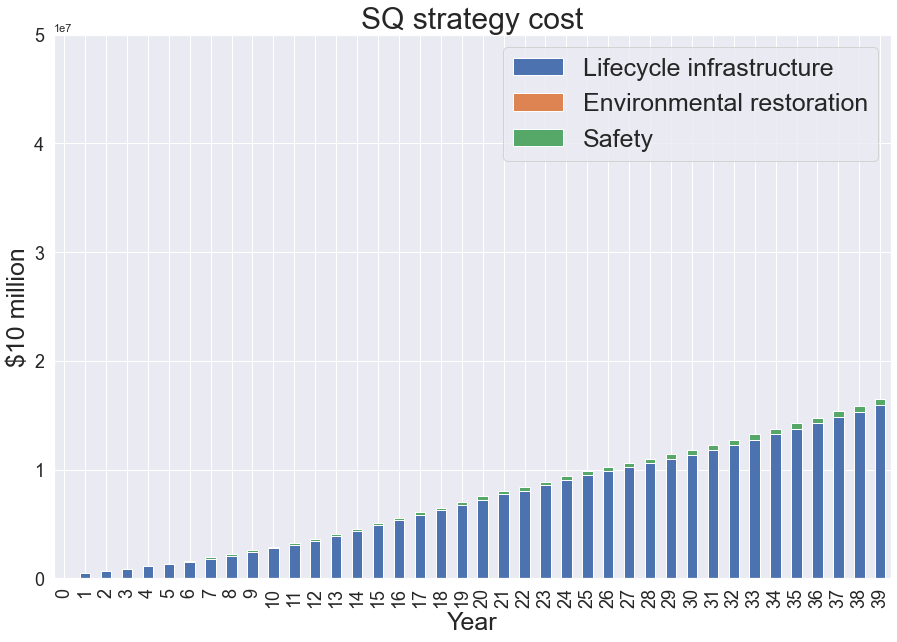

In [26]:
# plotting statusquo strategy cost
with open(r'../../results/outcomes/cost-analyze-result-statusQuo-strategy.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['lifecycle infrastructure', 'environmental restoration', 'safety']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([0, 50000000])
plt.grid()
#scale_factor=0.01
#ymin, ymax = plt.ylim()
#plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.title("SQ strategy cost", fontsize=30)
plt.ylabel('$10 million',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.legend(['Lifecycle infrastructure', 'Environmental restoration', 'Safety'], fontsize=25)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/statusQuo-strategy-cost.png')

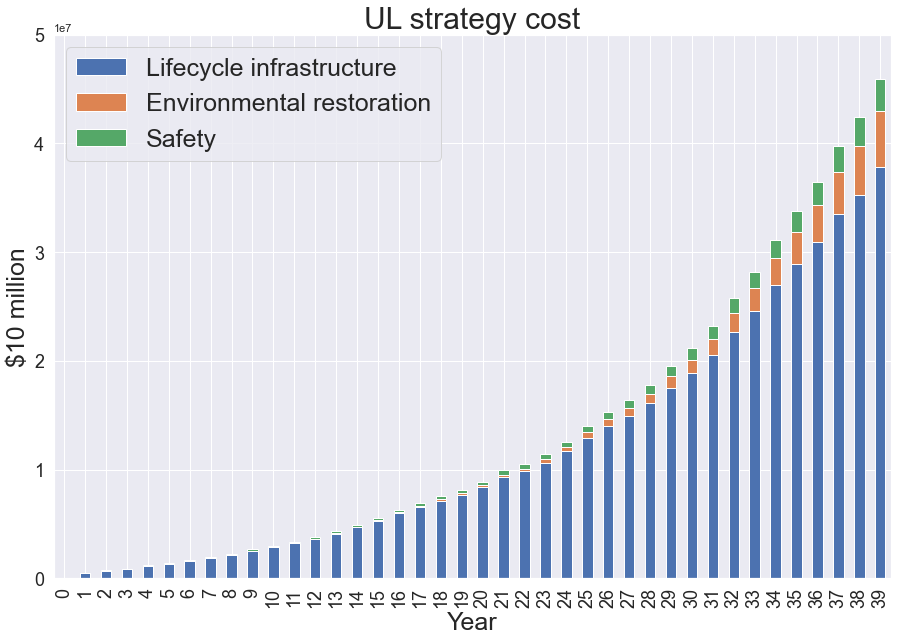

In [25]:
# plotting undergrounding after lifespan strategy cost
with open(r'../../results/outcomes/cost-analyze-result-undergrounding-strategy.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['lifecycle infrastructure', 'environmental restoration', 'safety']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.grid()
plt.ylim([0, 50000000])
plt.title("UL strategy cost", fontsize=30)
plt.ylabel('$10 million',fontsize=25)
plt.xlabel('Year',fontsize=25)
plt.legend(['Lifecycle infrastructure', 'Environmental restoration', 'Safety'], fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/undergrounding-after-lifespan-strategy-cost.png')

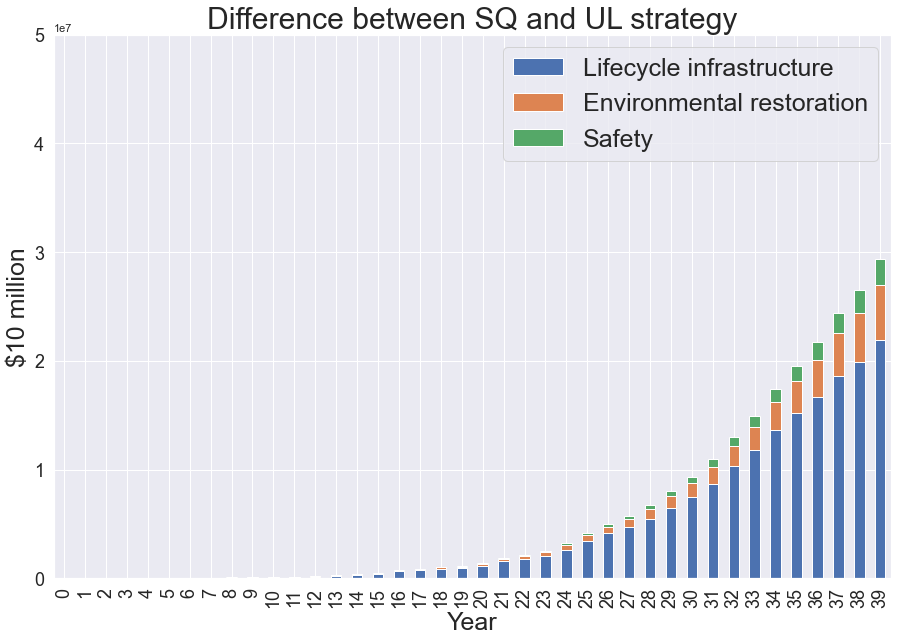

In [24]:
# plotting additional cost due to undergrounding
with open(r'../../results/outcomes/cost-analyze-result-additional-cost.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['lifecycle infrastructure', 'environmental restoration', 'safety']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True)
plt.grid()
plt.ylim([0, 50000000])
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title("Difference between SQ and UL strategy", fontsize=30)
plt.ylabel('$10 million', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.legend(['Lifecycle infrastructure', 'Environmental restoration', 'Safety'], fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.figure(figsize=(3, 3))
plt.savefig(r'../../figures/additional-cost-undergrounding.png')

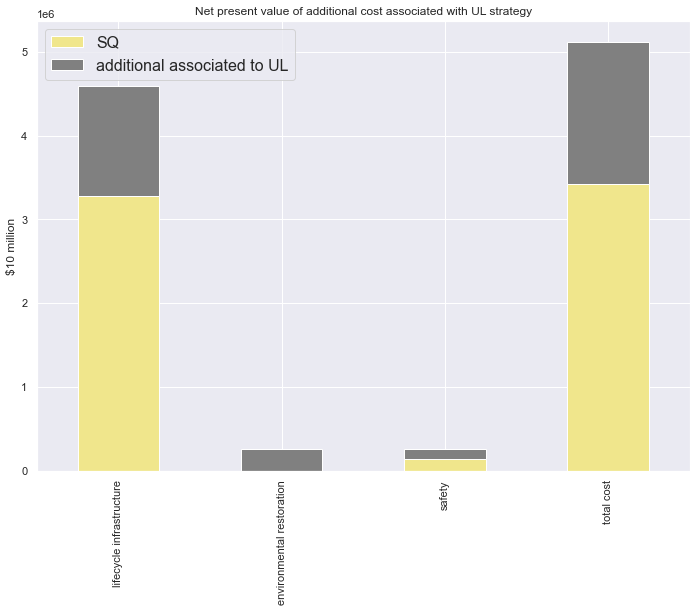

In [51]:
# plotting net present value of cost
with open(r'../../results/outcomes/cost-net-present-value-statusQuo.csv') as ns:
    net_cost_statusQuo= pd.read_csv(ns)
with open(r'../../results/outcomes/cost-net-present-value-additional.csv') as na:
    net_cost_additional= pd.read_csv(na) 
frames = [net_cost_statusQuo, net_cost_additional]
result = pd.concat(frames)
result['strategy']=['SQ','additional associated to UL']
result.set_index('strategy').T.plot.bar(stacked=True, color=['khaki','gray'])
plt.title("Net present value of additional cost associated with UL strategy")
plt.ylabel('$10 million')
plt.legend(fontsize=16)
#plt.figure(figsize=(3, 3))
plt.savefig(r'../../figures/net-present-cost.png', dpi=100)

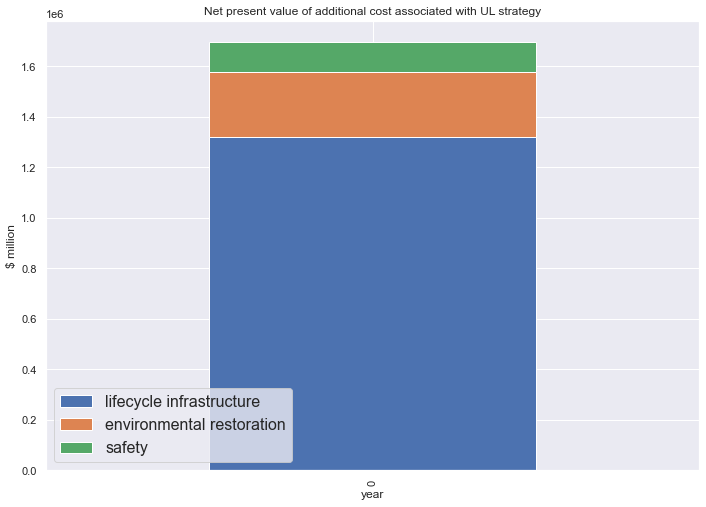

In [52]:
# plotting net present value of costs
with open(r'../../results/outcomes/cost-net-present-value-additional.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['lifecycle infrastructure', 'environmental restoration', 'safety']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True)
plt.title("Net present value of additional cost associated with UL strategy")
plt.ylabel('$ million')
plt.xlabel('year')
plt.legend(fontsize=16)
plt.savefig(r'../../figures/net-present-additional-cost.png.png')

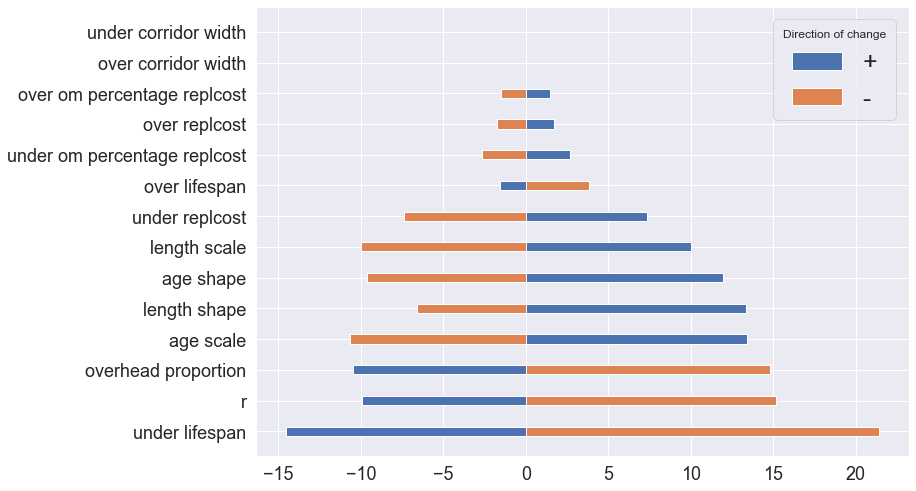

In [9]:
# plotting sensitivity analysis results for statusquo strategy
with open(r'../../results/outcomes/cost-sensitivity-result-statusquo.csv') as ss:
    sensitivity_statusQuo=pd.read_csv(ss)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# creating a dataframe
df = pd.DataFrame()
df['input'] = [sensitivity_statusQuo.iloc[7][0],sensitivity_statusQuo.iloc[0][0],sensitivity_statusQuo.iloc[5][0],sensitivity_statusQuo.iloc[13][0],sensitivity_statusQuo.iloc[10][0],sensitivity_statusQuo.iloc[12][0],sensitivity_statusQuo.iloc[11][0],sensitivity_statusQuo.iloc[4][0],sensitivity_statusQuo.iloc[6][0],sensitivity_statusQuo.iloc[9][0],sensitivity_statusQuo.iloc[3][0],sensitivity_statusQuo.iloc[8][0],sensitivity_statusQuo.iloc[1][0],sensitivity_statusQuo.iloc[2][0]]
df['+']=[sensitivity_statusQuo.iloc[7][1],sensitivity_statusQuo.iloc[0][1],sensitivity_statusQuo.iloc[5][1],sensitivity_statusQuo.iloc[13][1],sensitivity_statusQuo.iloc[10][1],sensitivity_statusQuo.iloc[12][1],sensitivity_statusQuo.iloc[11][1],sensitivity_statusQuo.iloc[4][1],sensitivity_statusQuo.iloc[6][1],sensitivity_statusQuo.iloc[9][1],sensitivity_statusQuo.iloc[3][1],sensitivity_statusQuo.iloc[8][1],sensitivity_statusQuo.iloc[1][1],sensitivity_statusQuo.iloc[2][1]]
df['-']=[sensitivity_statusQuo.iloc[7][2],sensitivity_statusQuo.iloc[0][2],sensitivity_statusQuo.iloc[5][2],sensitivity_statusQuo.iloc[13][2],sensitivity_statusQuo.iloc[10][2],sensitivity_statusQuo.iloc[12][2],sensitivity_statusQuo.iloc[11][2],sensitivity_statusQuo.iloc[4][2],sensitivity_statusQuo.iloc[6][2],sensitivity_statusQuo.iloc[9][2],sensitivity_statusQuo.iloc[3][2],sensitivity_statusQuo.iloc[8][2],sensitivity_statusQuo.iloc[1][2],sensitivity_statusQuo.iloc[2][2]]

#now stacking it
df2 = pd.melt(df, id_vars ='input', var_name='type of change', value_name='change in the output' )

fig, ax = plt.subplots()
for typ, df in zip(df2['type of change'].unique(),df2.groupby('type of change')):
    ax.barh(df[1]['input'], df[1]['change in the output'], height=0.3, label=typ)
ax.legend(title = 'Direction of change', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/cost-sensitivity-statusQuo.png', dpi=300, bbox_inches='tight')

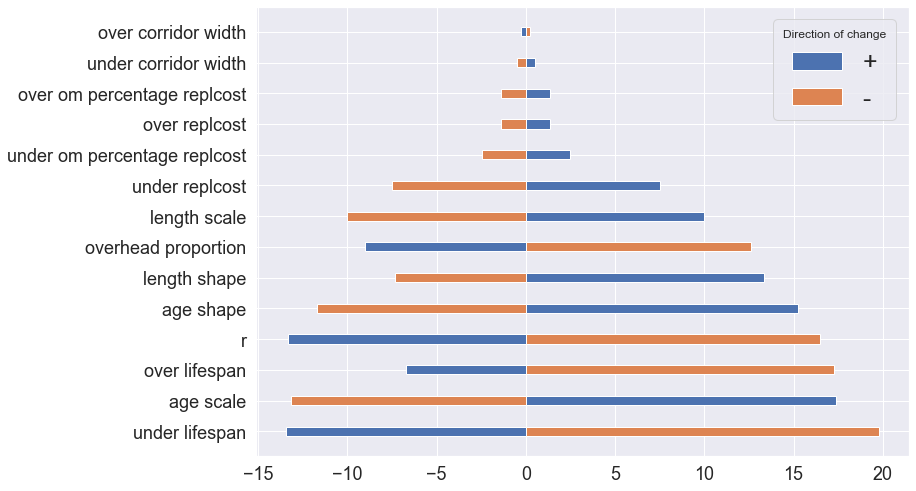

In [10]:
# openning the sensitivity analysis results for under strategy
with open(r'../../results/outcomes/cost-sensitivity-result-under.csv') as su:
    sensitivity_under=pd.read_csv(su)
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# creating a dataframe
df = pd.DataFrame()
df['input'] = [sensitivity_under.iloc[7][0],sensitivity_under.iloc[13][0],sensitivity_under.iloc[6][0],sensitivity_under.iloc[0][0],sensitivity_under.iloc[12][0],sensitivity_under.iloc[10][0],sensitivity_under.iloc[5][0],sensitivity_under.iloc[11][0],sensitivity_under.iloc[4][0],sensitivity_under.iloc[9][0],sensitivity_under.iloc[3][0],sensitivity_under.iloc[8][0],sensitivity_under.iloc[2][0],sensitivity_under.iloc[1][0]]
df['+']=[sensitivity_under.iloc[7][1],sensitivity_under.iloc[13][1],sensitivity_under.iloc[6][1],sensitivity_under.iloc[0][1],sensitivity_under.iloc[12][1],sensitivity_under.iloc[10][1],sensitivity_under.iloc[5][1],sensitivity_under.iloc[11][1],sensitivity_under.iloc[4][1],sensitivity_under.iloc[9][1],sensitivity_under.iloc[3][1],sensitivity_under.iloc[8][1],sensitivity_under.iloc[2][1],sensitivity_under.iloc[1][1]]
df['-']=[sensitivity_under.iloc[7][2],sensitivity_under.iloc[13][2],sensitivity_under.iloc[6][2],sensitivity_under.iloc[0][2],sensitivity_under.iloc[12][2],sensitivity_under.iloc[10][2],sensitivity_under.iloc[5][2],sensitivity_under.iloc[11][2],sensitivity_under.iloc[4][2],sensitivity_under.iloc[9][2],sensitivity_under.iloc[3][2],sensitivity_under.iloc[8][2],sensitivity_under.iloc[2][2],sensitivity_under.iloc[1][2]]

#now stacking it
df2 = pd.melt(df, id_vars ='input', var_name='type of change', value_name='change in the output' )

fig, ax = plt.subplots()
for typ, df in zip(df2['type of change'].unique(),df2.groupby('type of change')):
    ax.barh(df[1]['input'], df[1]['change in the output'], height=0.3, label=typ)
ax.legend(title = 'Direction of change', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/cost-sensitivity-under.png', dpi=300, bbox_inches='tight')

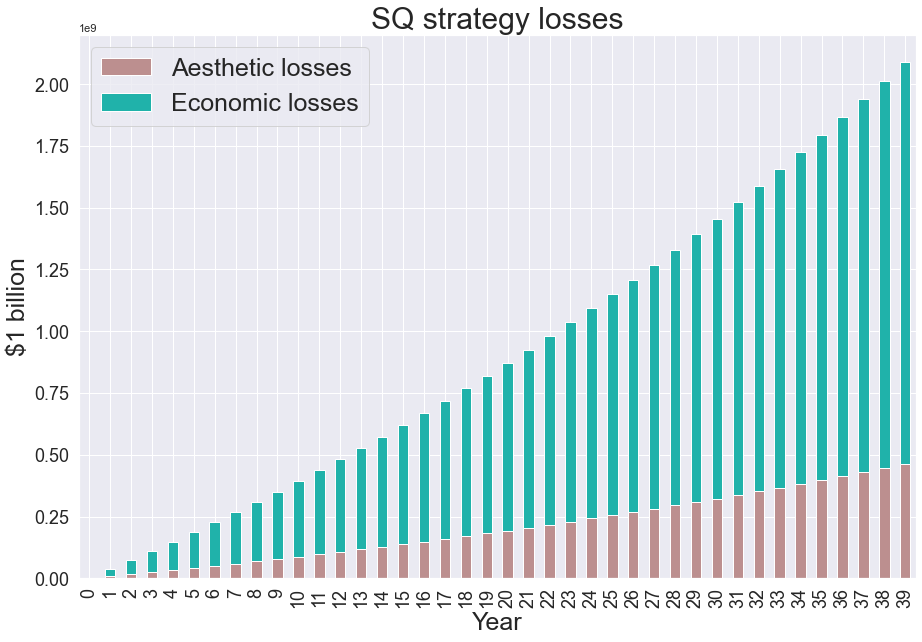

In [30]:
# plotting statusquo strategy losses
with open(r'../../results/outcomes/benefit-analyze-result-statusQuo-strategy.csv') as ra:
    additional_losses=pd.read_csv(ra)
new_additional_losses= additional_losses[['aesthetic losses', 'economic losses']].copy()
newer_additional_losses=np.cumsum(new_additional_losses)
newer_additional_losses.plot.bar(stacked=True,color=['rosybrown','lightseagreen'])
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([0, 2200000000])
plt.grid()
plt.title("SQ strategy losses", fontsize=30)
plt.ylabel('$1 billion', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.legend(['Aesthetic losses', 'Economic losses'], fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.figure(figsize=(3, 3))
#plt.legend('Lifecycle infrastructure', 'Environmental restoration', 'Safety & Health')
plt.savefig(r'../../figures/statusQuo-strategy-losses.png')

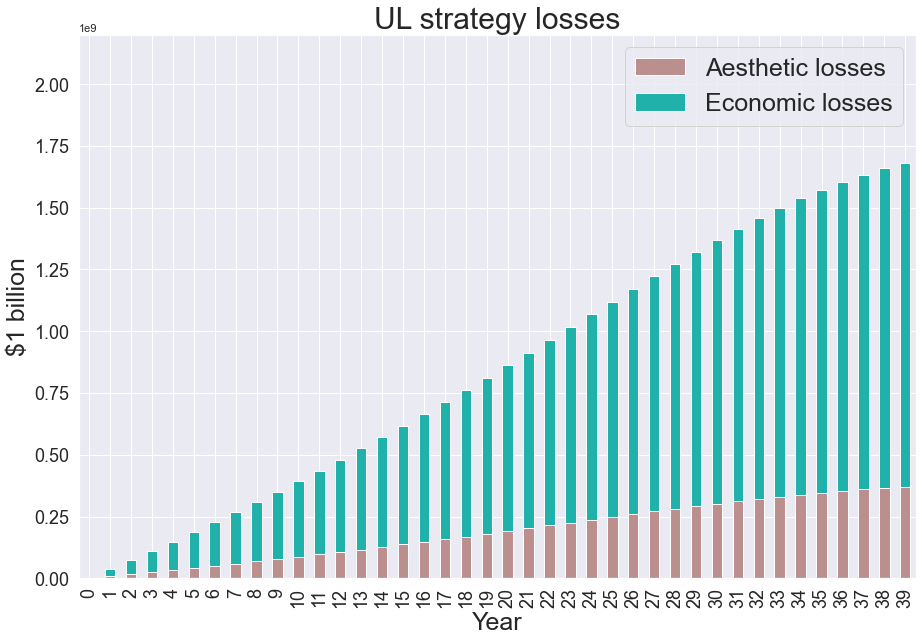

In [31]:
# plotting undergrounding after lifespan strategy losses
with open(r'../../results/outcomes/benefit-analyze-undergrounding-strategy.csv') as ra:
    additional_losses=pd.read_csv(ra)
new_additional_losses= additional_losses[['aesthetic losses', 'economic losses']].copy()
newer_additional_losses=np.cumsum(new_additional_losses)
newer_additional_losses.plot.bar(stacked=True,color=['rosybrown','lightseagreen'])
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([0, 2200000000])
plt.grid()
plt.title("UL strategy losses", fontsize=30)
plt.ylabel('$1 billion', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.legend(['Aesthetic losses', 'Economic losses'], fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/undergrounding-after-lifespan-strategy-losses.png')

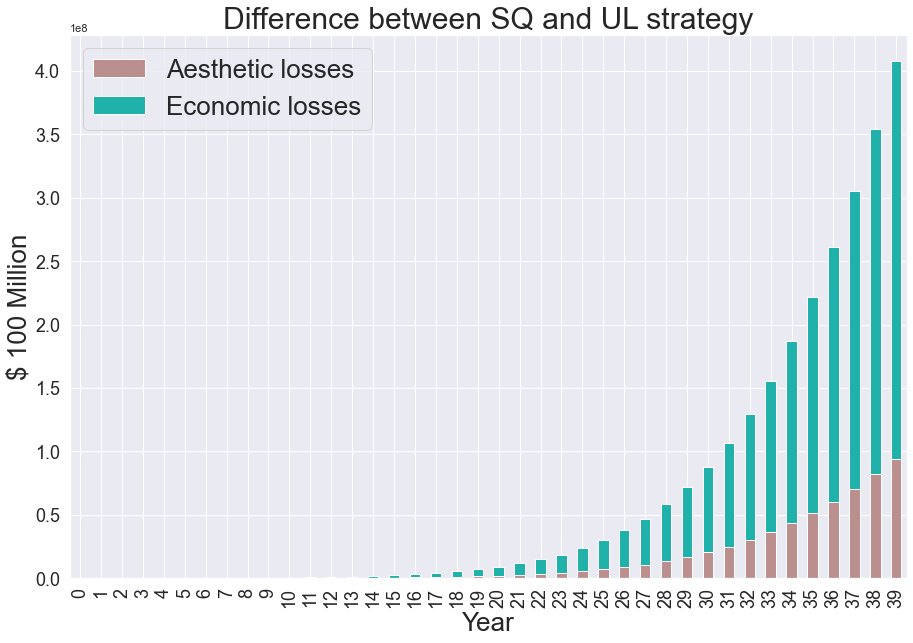

In [32]:
# plotting additional losses due to undergrounding
with open(r'../../results/outcomes/benefit-analyze-result-additional.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['aesthetic losses', 'economic losses']].copy()
#new_additional_cost=-1*new_additional_cost
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True,color=['rosybrown','lightseagreen'])
plt.title("Difference between SQ and UL strategy", fontsize=30)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-4000000000,0])
plt.grid()
plt.ylabel('$ 100 Million',fontsize=26)
plt.xlabel('Year',fontsize=26)
plt.legend(['Aesthetic losses', 'Economic losses'], fontsize=26)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
plt.savefig(r'../../figures/additional-losses-statusQuo.png')

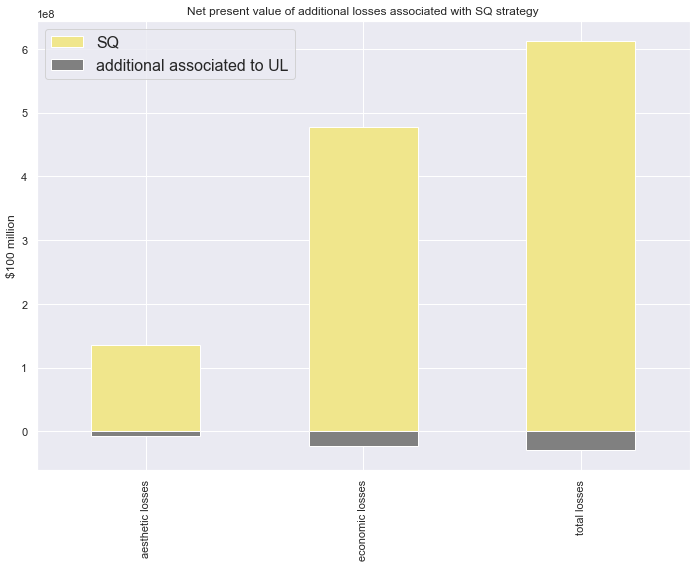

In [64]:
# plotting net present value of losses
with open(r'../../results/outcomes/benefit-net-present-value-under.csv') as ns:
    net_losses_statusQuo= pd.read_csv(ns)
with open(r'../../results/outcomes/benefit-net-present-value-additional.csv') as na:
    net_losses_additional= pd.read_csv(na) 
frames = [net_losses_statusQuo, net_losses_additional]
result = pd.concat(frames)
result['strategy']=['SQ','additional associated to UL']
result.set_index('strategy').T.plot.bar(stacked=True, color=['khaki','gray'])
plt.title("Net present value of additional losses associated with SQ strategy")
plt.ylabel('$100 million')
plt.legend(fontsize=16)
#plt.figure(figsize=(3, 3))
plt.savefig(r'../../figures/net-present-cost.png', dpi=100)

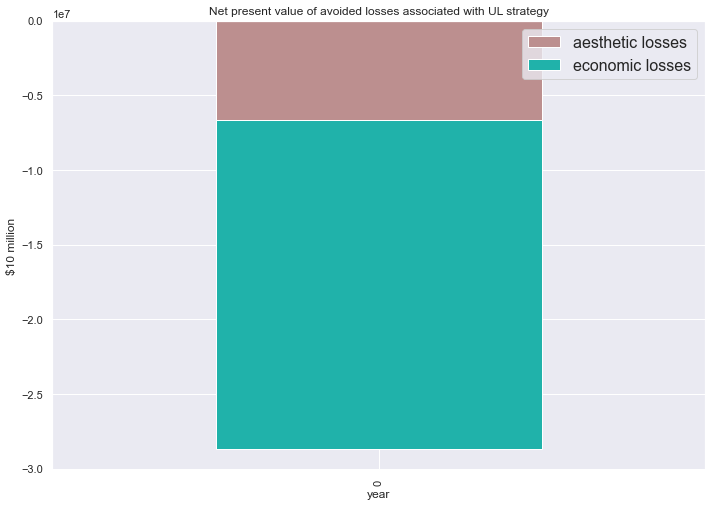

In [65]:
# plotting net present value of benefits(avoided losses)
with open(r'../../results/outcomes/benefit-net-present-value-additional.csv') as ra:
    additional_cost=pd.read_csv(ra)
new_additional_cost= additional_cost[['aesthetic losses', 'economic losses']].copy()
newer_additional_cost=np.cumsum(new_additional_cost)
newer_additional_cost.plot.bar(stacked=True, color=['rosybrown','lightseagreen'])
plt.title("Net present value of avoided losses associated with UL strategy")
plt.ylabel('$10 million')
plt.xlabel('year')
plt.legend(fontsize=16)
plt.savefig(r'../../figures/net-present-benefit.png.png')